In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
train_x = np.genfromtxt('train_in.csv', delimiter =',')
train_y = np.genfromtxt('train_out.csv', delimiter = ',')

test_x = np.genfromtxt('test_in.csv', delimiter = ',')
test_y = np.genfromtxt('test_out.csv', delimiter=',')

In [3]:
classifier_freq = np.ones( 10, dtype=int )
pixel_freq = np.ones( (16*16,10), dtype=int )
N,D = train_x.shape


In [4]:
fives_train = train_x[train_y == 1]
three_train = train_x[train_y == 9]

fives = test_x[test_y == 1]
threes = test_x[test_y == 9]

pixel_freq_5 = np.ones(16*16)
pixel_freq_3 = np.zeros(16*16)

number_5 = len(fives_train)
number_3 = len(three_train)

# count the number of times a pixel is black for every class
for i in range(len(fives_train)):
    pixel_freq_5[i] = np.count_nonzero(fives_train[i,:] == 1)+1
   
for i in range(len(three_train)):
    pixel_freq_3[i] = np.count_nonzero(three_train[i,:] == 1)+1
  

In [5]:
five_three =np.concatenate((fives, threes), axis=0)


In [6]:
# prior C1  num. of samples in C1 row / number of all samples
no_samples = number_5 + number_3
prior_5 = number_5/no_samples
prior_3 = number_3/no_samples

In [53]:
#conditional propbalility

#Divide the count of black pixels by the number of times a class appears, to get a percentage.

cp_5 = np.zeros(16*16)
cp_3 = np.zeros(16*16)
for i in range(16 * 16):
        cp_5[i] = cp_5[i] + pixel_freq_5[i] 
        cp_3[i] = cp_3[i]+ pixel_freq_3[i] 
cp_5_all = sum(cp_5)/ number_5
cp_5_alll = sum(pixel_freq_5)/number_5
cp_3_all = sum(cp_3)/ number_3

In [7]:
#Divide the count of black pixels by the number of times a class appears, to get a percentage.
cp_5_all = sum(pixel_freq_5)/number_5
cp_3_all = sum(pixel_freq_3)/ number_3

In [9]:
print('cp',cp_5_all)
#print('cpp', cp_5_alll)
#print('thets',theta_hat_5)
#print(cp_3)

cp 17.1984126984


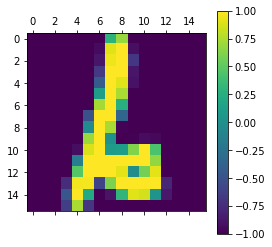

1


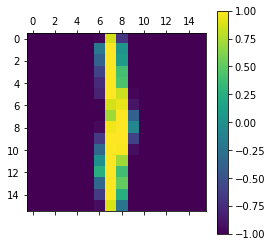

1


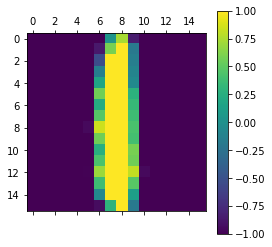

1


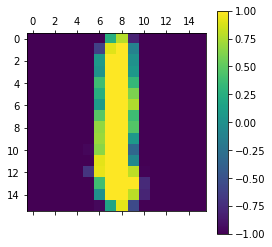

1


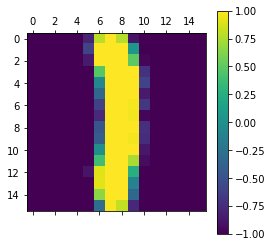

9


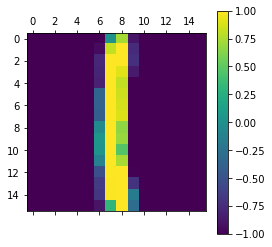

1


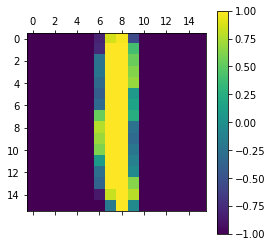

1


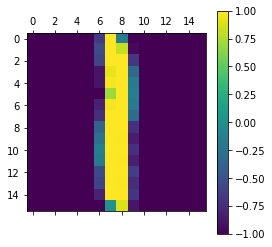

9


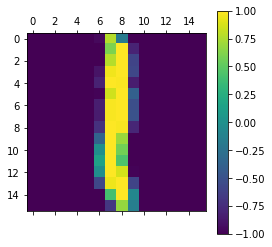

1


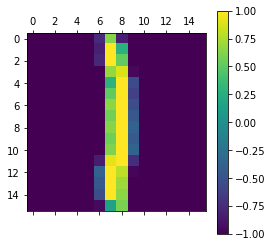

1


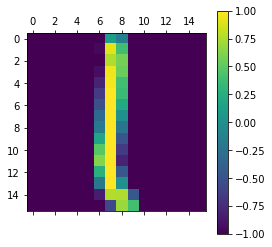

1


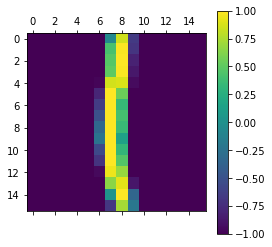

1


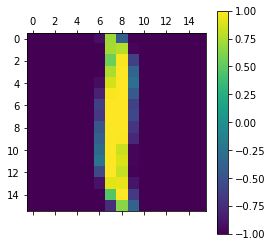

1


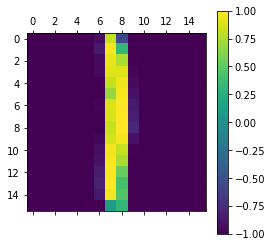

1


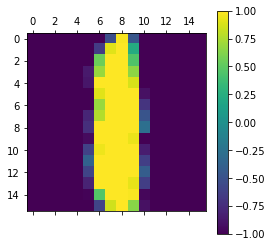

1


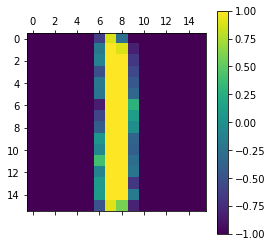

1


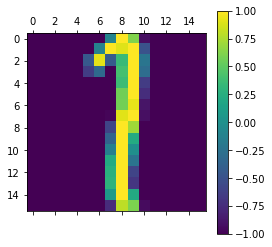

9


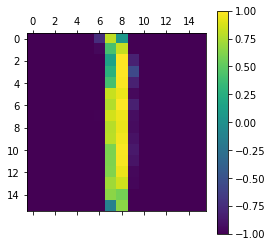

9


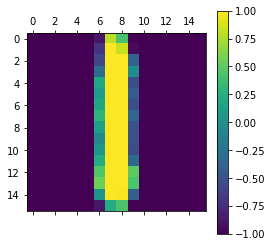

1


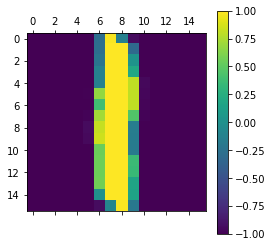

1


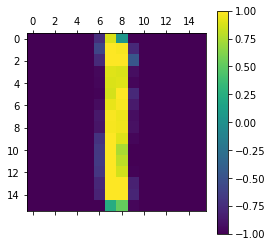

1


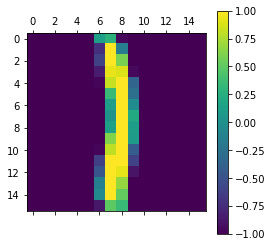

1


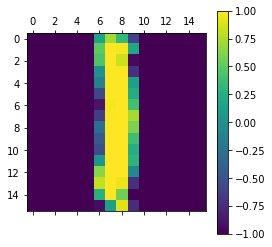

1


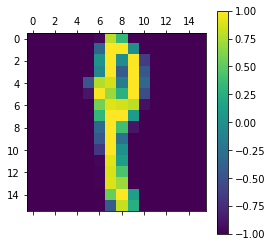

9


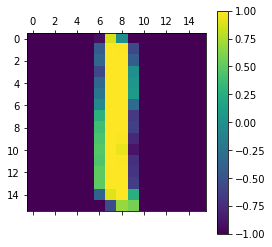

1


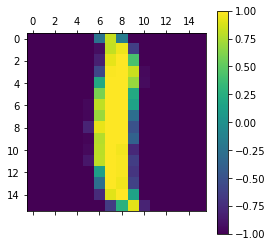

1


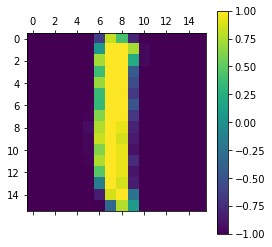

9


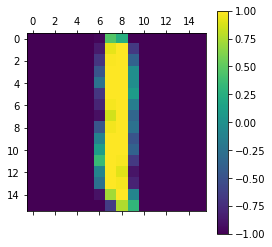

1


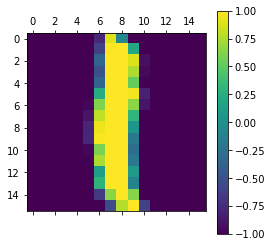

1


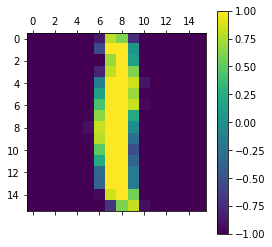

1


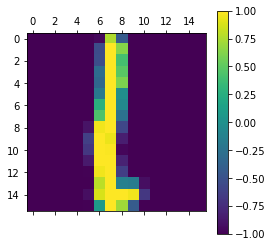

1


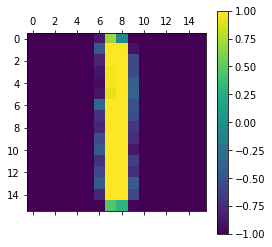

1


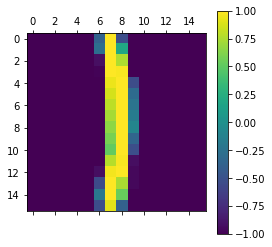

9


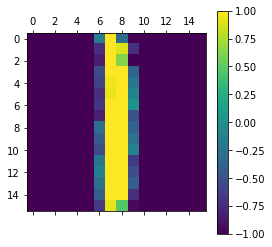

1


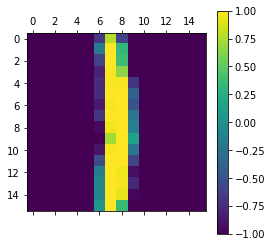

1


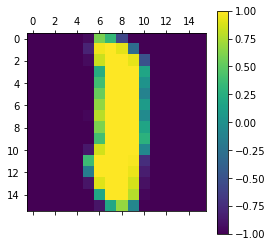

1


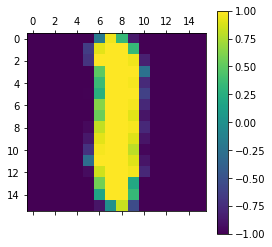

1


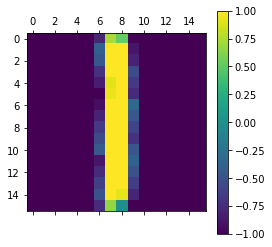

1


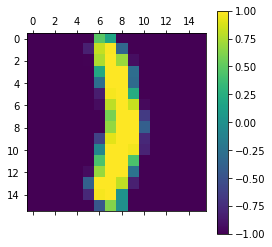

1


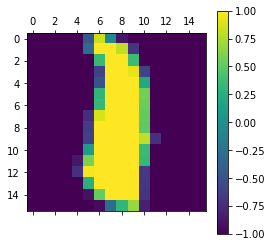

1


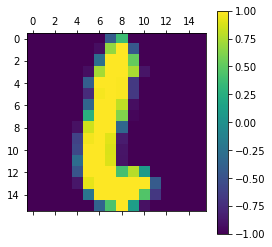

1


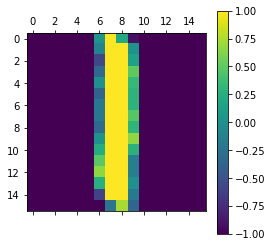

1


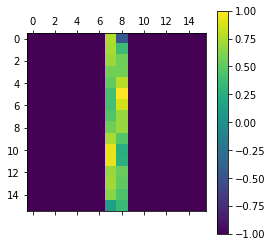

9


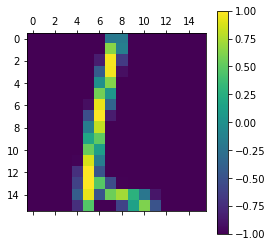

9


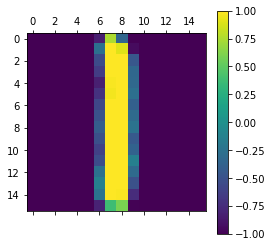

1


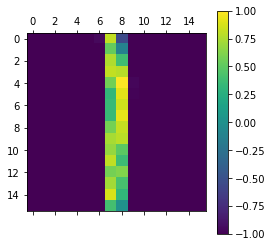

9


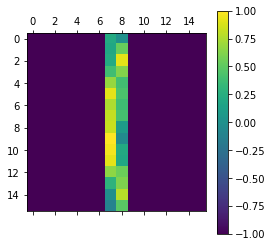

1


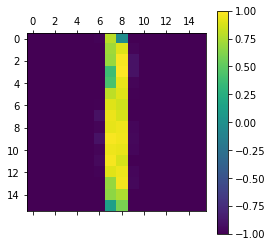

9


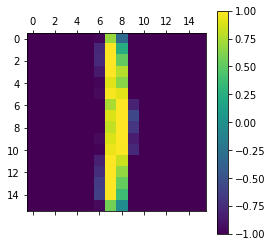

1


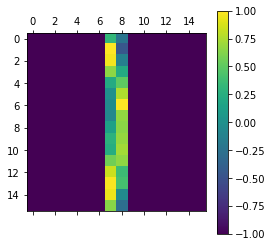

9


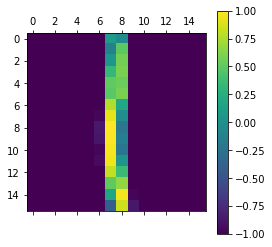

1


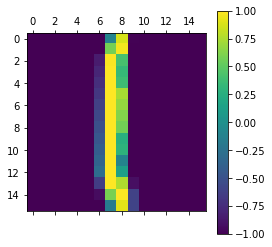

1


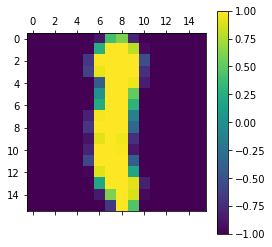

1


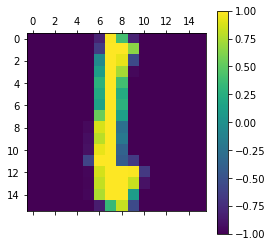

1


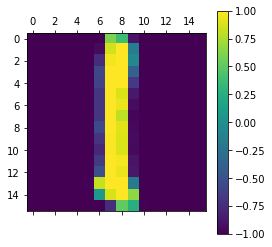

1


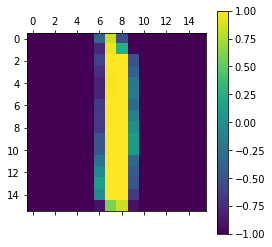

1


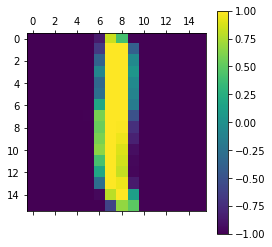

1


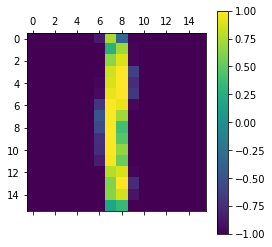

1


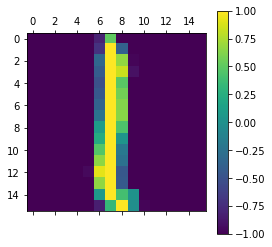

1


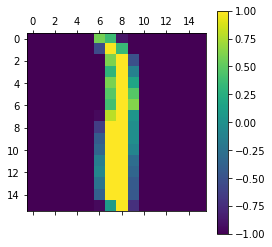

1


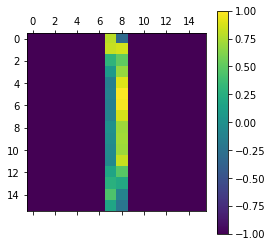

9


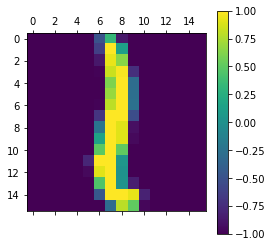

1


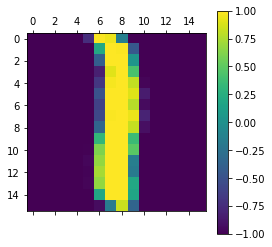

1


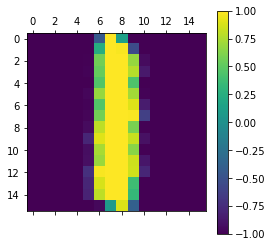

1


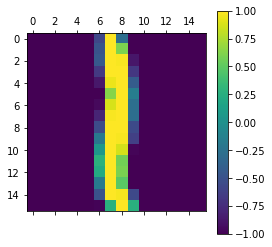

1


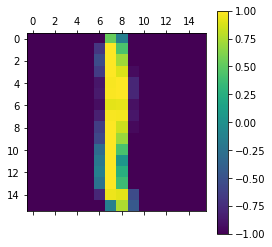

1


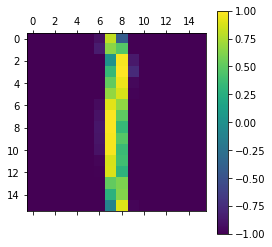

9


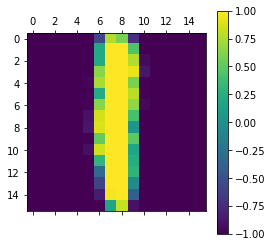

1


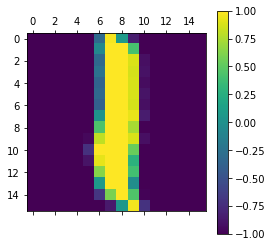

1


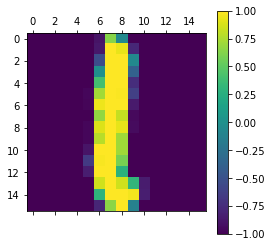

1


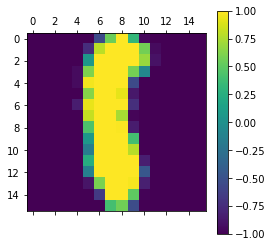

1


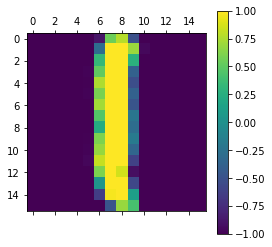

1


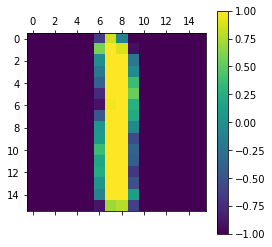

1


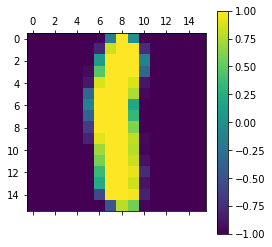

1


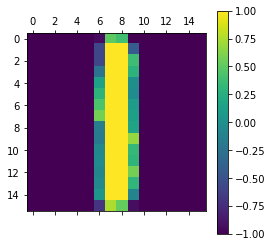

1


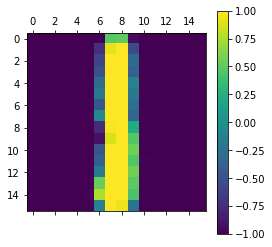

1


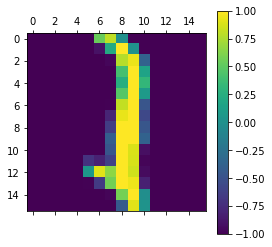

9


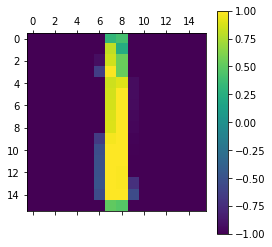

1


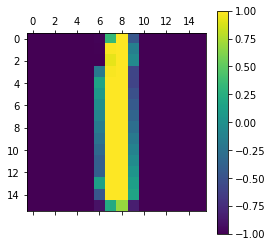

1


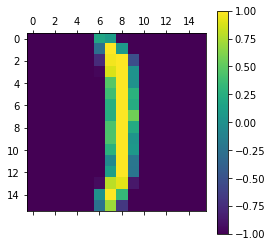

9


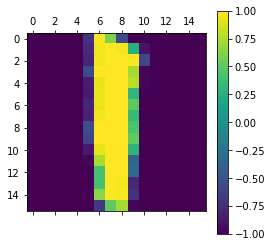

1


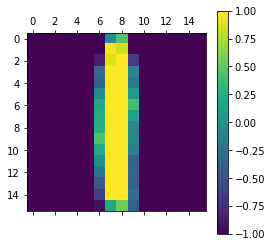

1


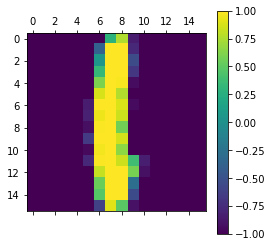

1


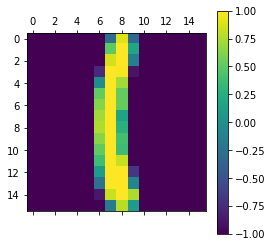

1


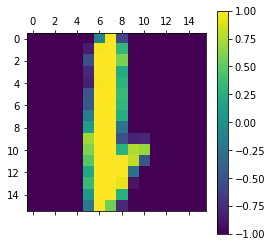

1


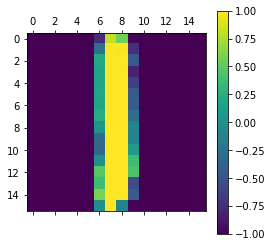

1


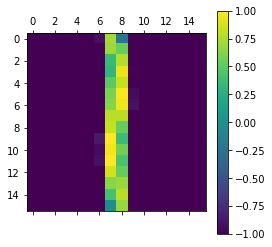

1


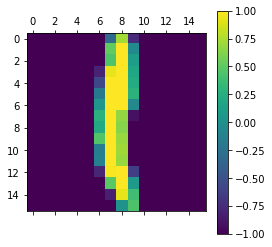

9


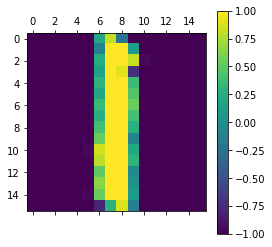

1


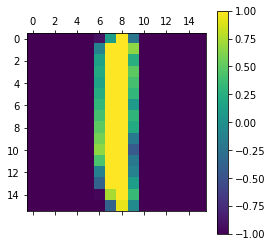

1


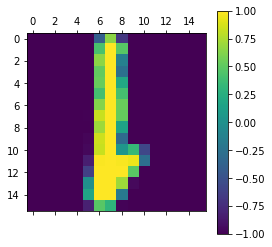

1


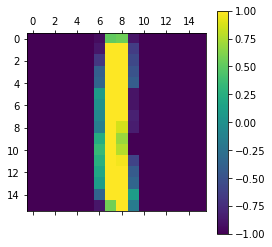

1


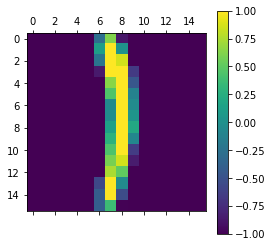

9


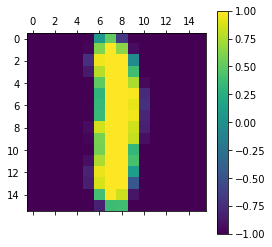

1


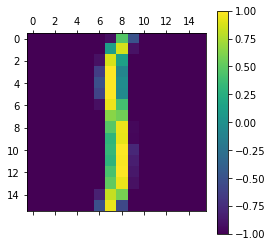

1


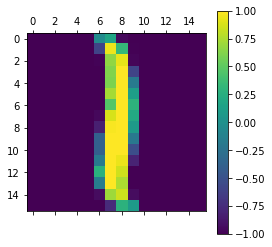

1


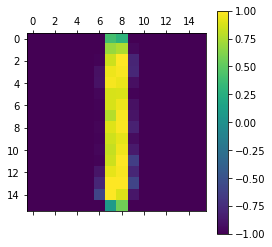

1


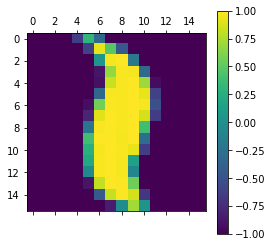

1


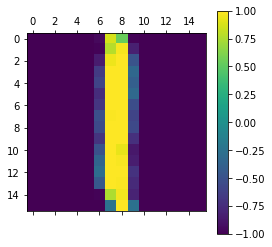

1


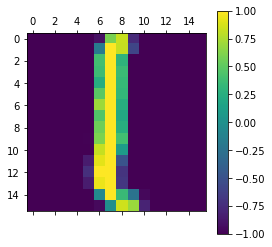

1


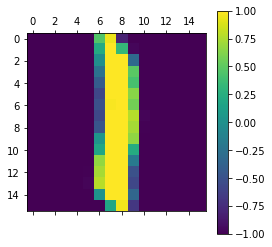

1


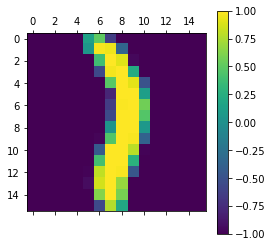

1


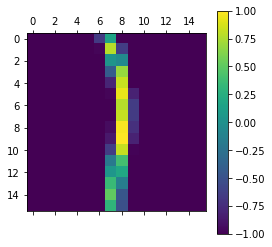

1


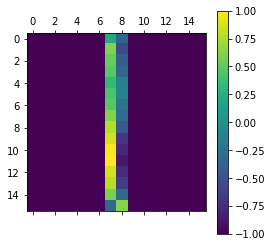

1


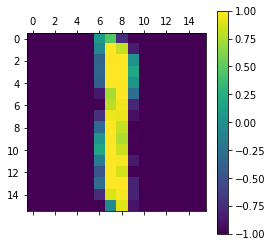

1


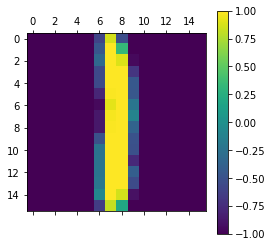

1


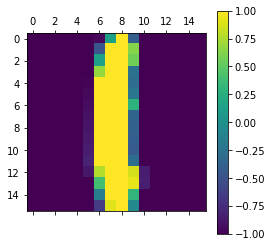

1


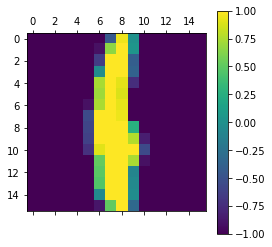

1


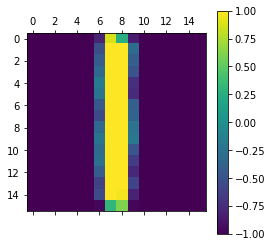

1


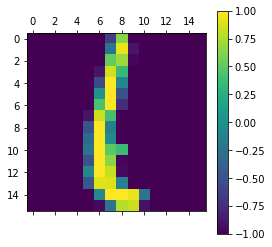

1


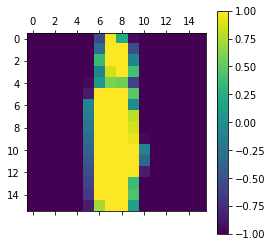

1


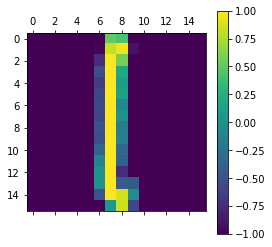

1


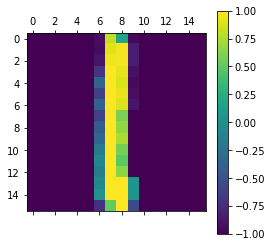

1


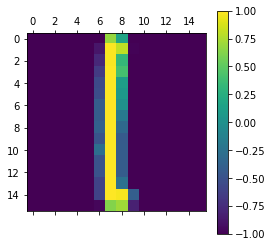

1


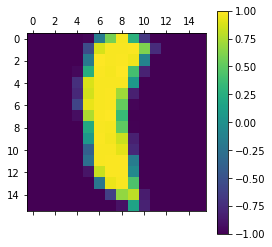

9


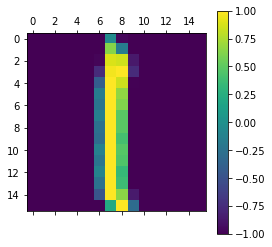

1


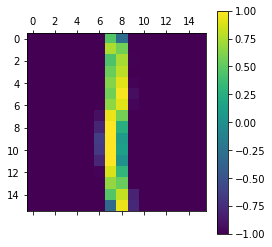

1


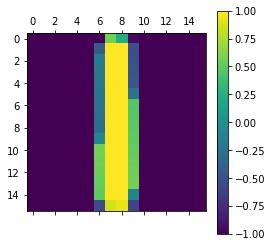

1


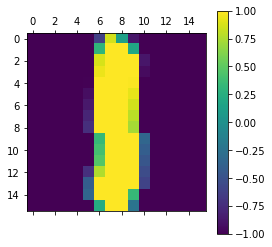

1


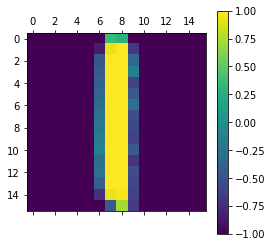

1


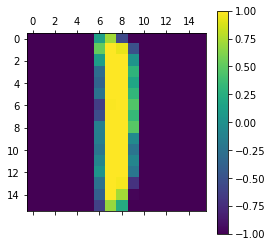

1


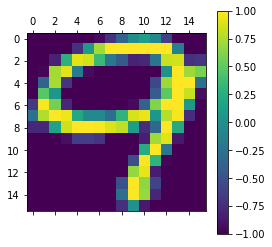

9


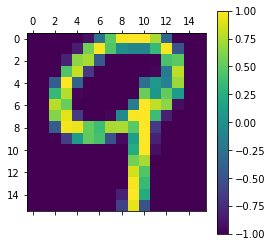

9


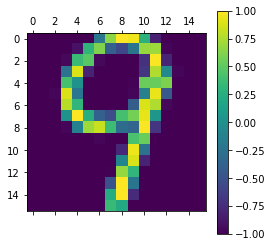

1


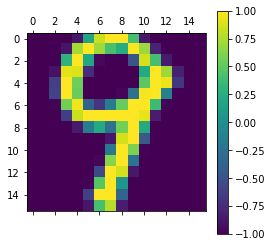

9


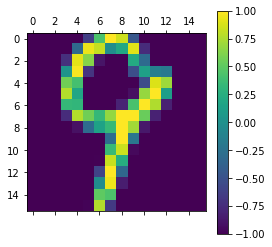

9


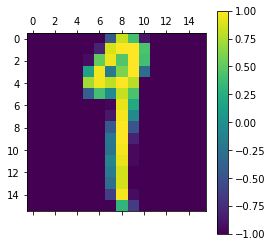

9


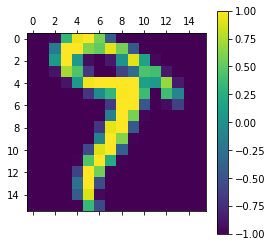

9


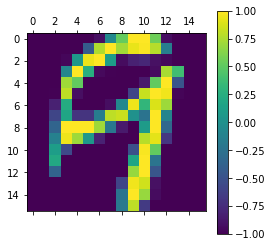

9


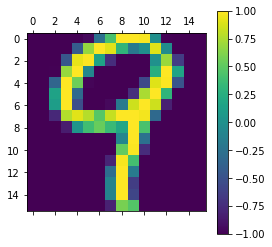

9


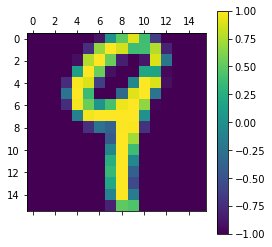

9


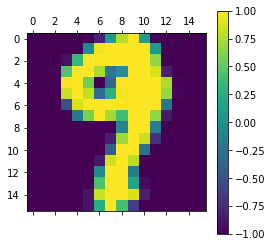

9


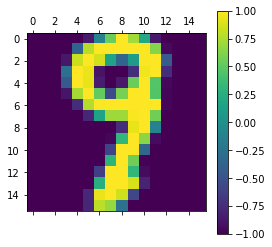

9


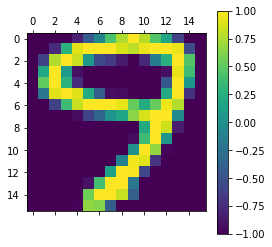

9


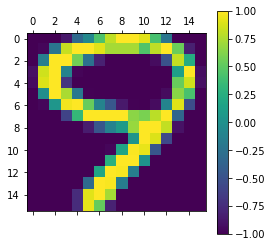

9


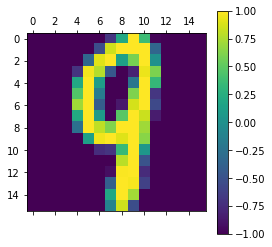

9


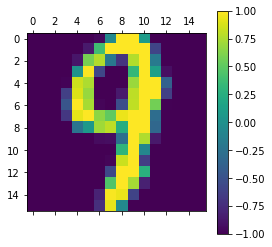

9


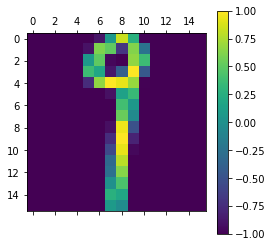

1


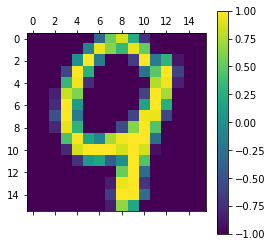

9


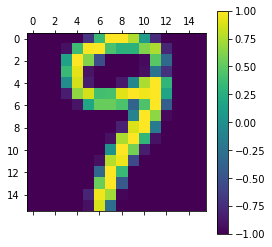

9


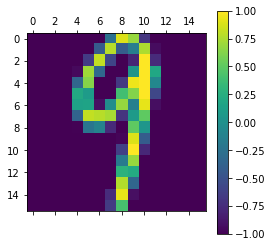

9


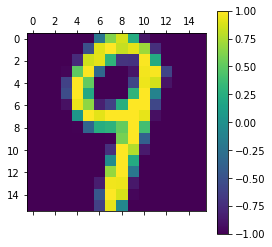

9


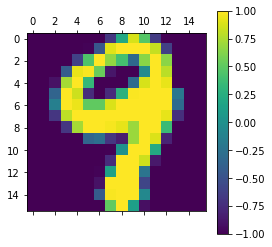

9


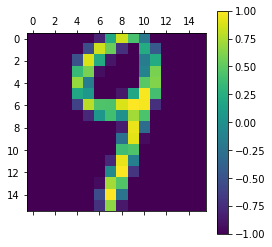

1


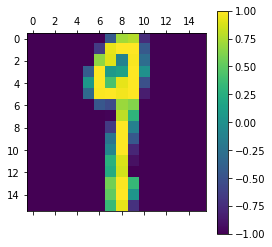

9


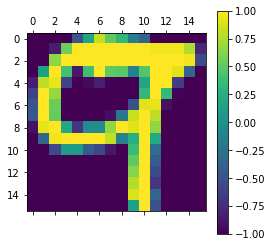

9


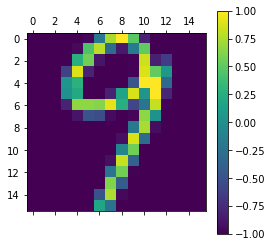

9


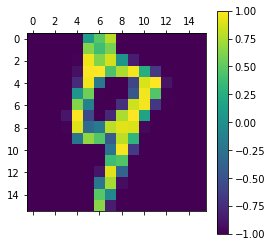

9


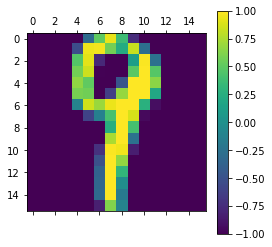

9


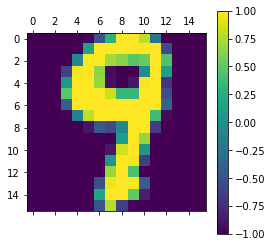

9


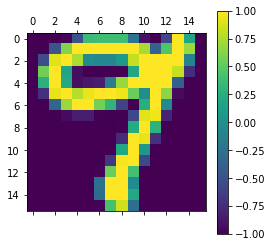

9


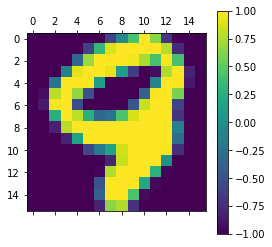

9


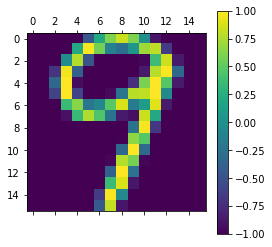

9


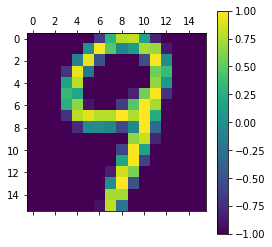

9


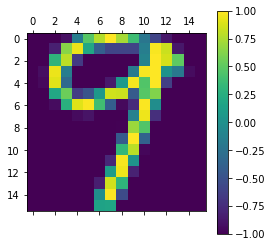

9


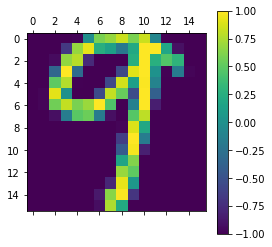

9


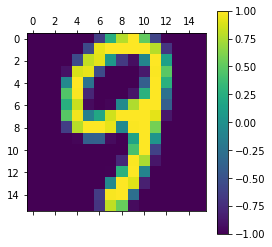

9


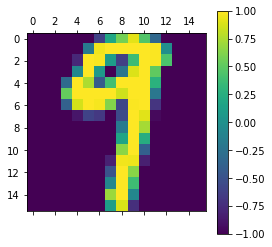

9


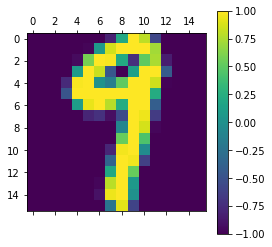

9


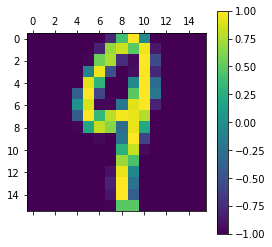

9


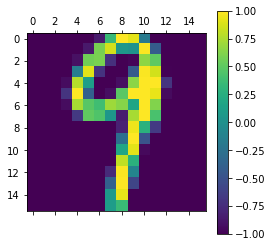

9


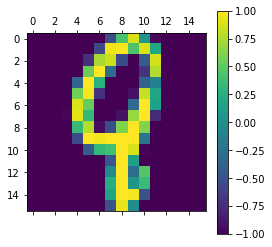

1


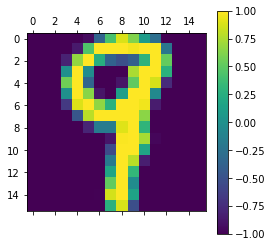

9


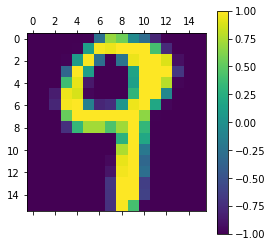

9


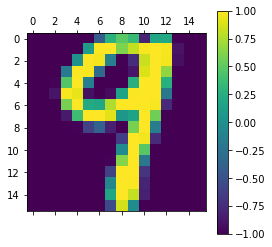

9


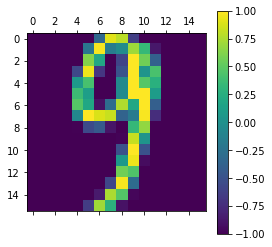

9


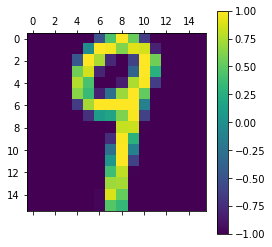

9


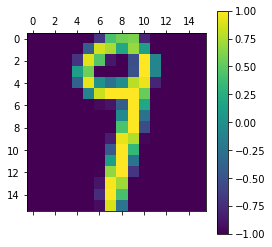

9


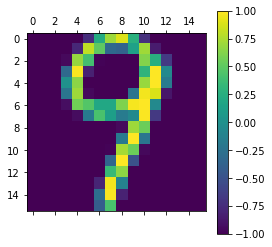

1


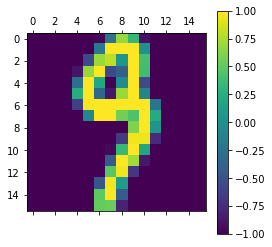

9


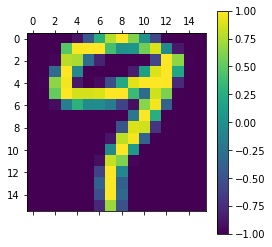

9


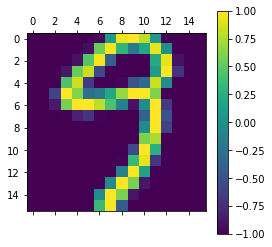

9


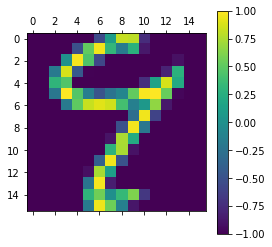

9


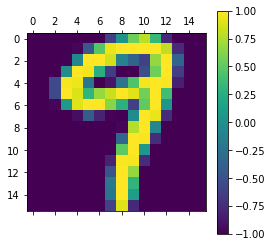

9


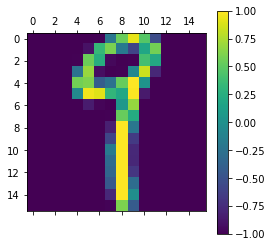

1


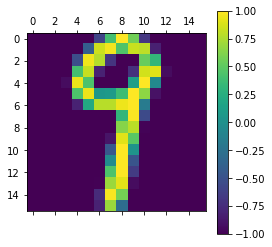

1


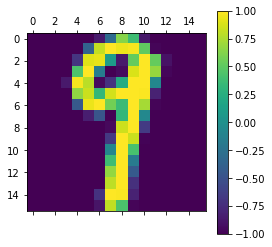

9


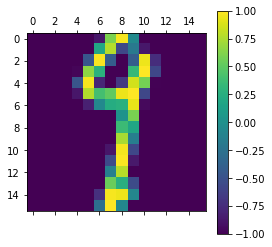

9


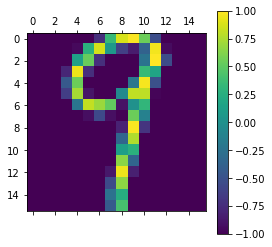

9


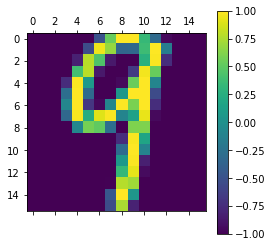

9


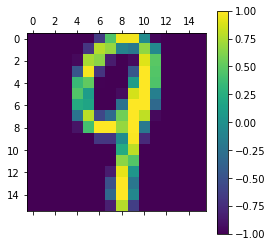

9


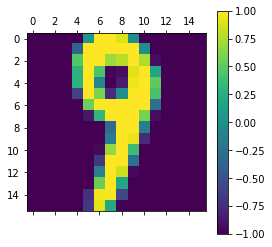

9


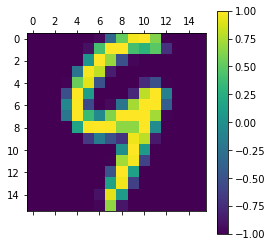

9


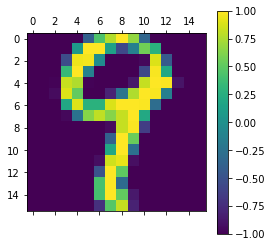

1


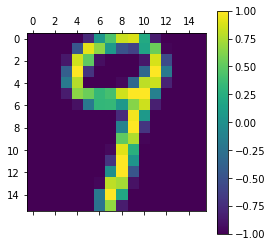

9


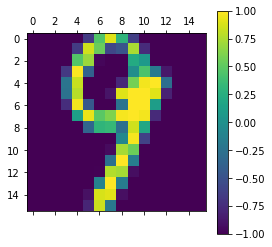

9


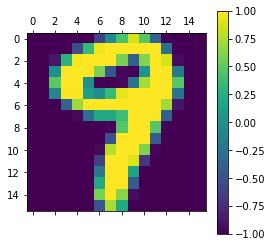

9


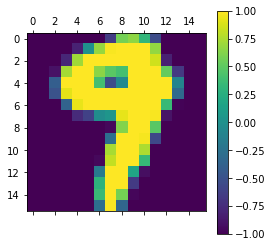

9


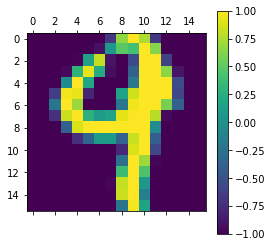

9


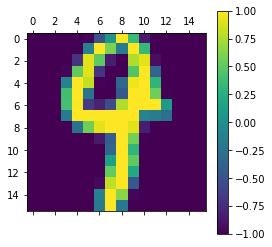

9


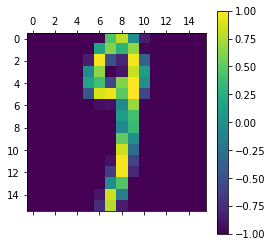

9


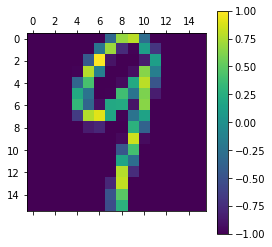

9


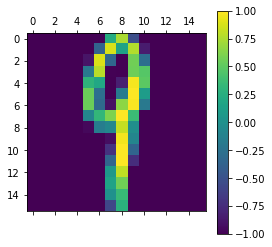

9


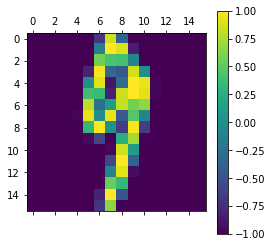

9


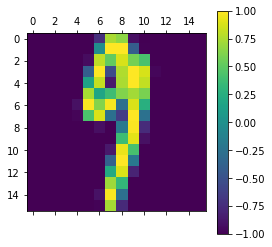

9


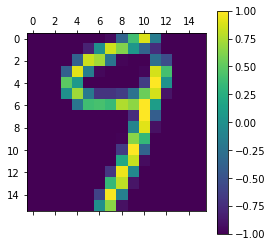

9


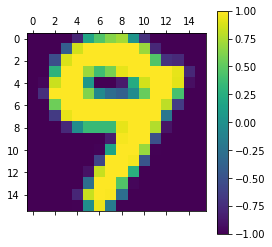

9


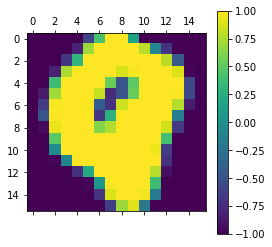

9


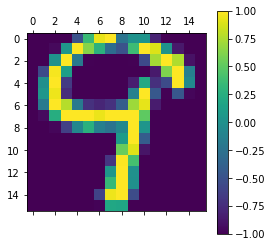

9


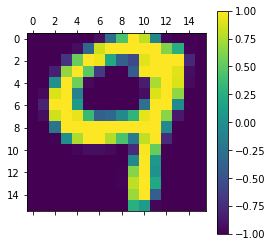

9


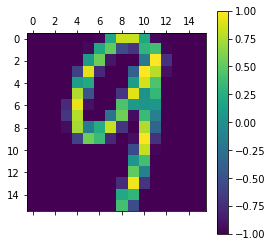

9


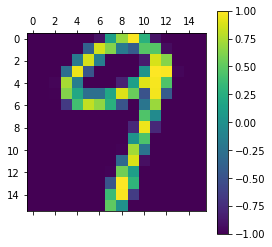

1


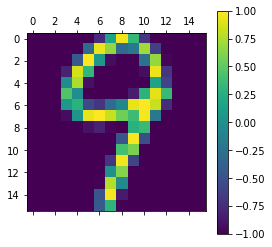

9


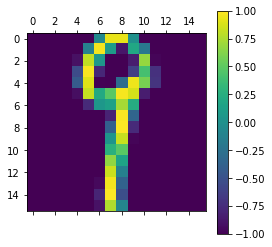

1


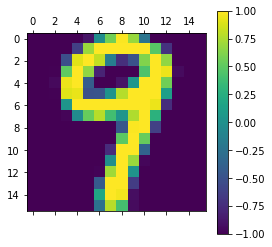

9


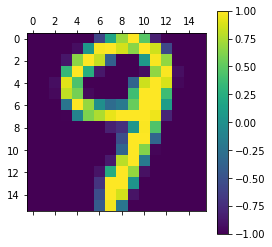

9


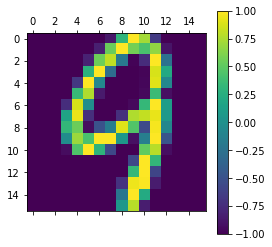

9


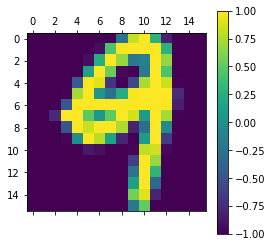

9


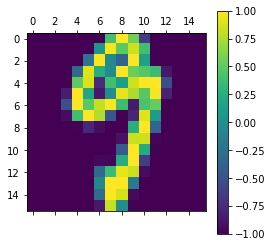

1


In [10]:
# compute the posterior predict

y_hat_5 = np.zeros( (16 * 16), dtype=float)
y_hat_3 = np.zeros((16*16),dtype= float)
for i in range(16 * 16):
    y_hat_5[i] = y_hat_5[i] + pixel_freq_5[i]/number_5
    y_hat_3[i] = y_hat_3[i] + pixel_freq_3[i] / number_3

test_sample = len(threes)+ len(fives)

for i in range(test_sample):
    lp_5 = cp_5_all
    lp_3 = cp_3_all

    #lp_5 = lp_5 + cp_5[i]
    #lp_3 = lp_3 + cp_3[i]
    for j  in range(16*16):
        
        if five_three[i,j] == 1:
            lp_5 = lp_5 + y_hat_5[j]
            lp_3 = lp_3 + y_hat_3[j]
     #       print('i j ',i,j, lp_5, lp_3)
        else:
            lp_5 = lp_5 +(1- y_hat_5[j])
            lp_3 = lp_3 +(1- y_hat_3[j]) 
        
    #lp_5_sum = sum(lp_5)
    #lp_3_sum = sum(lp_3)
    #print(lp_5)
    #if  lp_5 < lp_3:
    plt.matshow(five_three[i].reshape(16,16))
    plt.colorbar()
    plt.show()
    #print(lp_5, lp_3)
    if lp_5 > lp_3:
        print('1')
    else: 
        print('9')